## **05 회귀**

- 개념: 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것임.
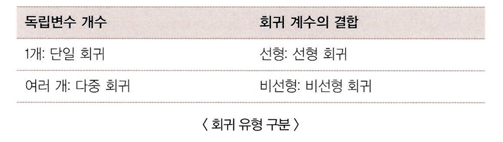

- 대표적인 선형 회귀 모델
  - 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하면, 규제를 적용하지 않은 모델
  - 릿지(Ridge): 선형 회귀에 L2 규제를 추가한 회귀 모델임. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 에측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델임.
  - 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식으로 L2 규제가 회귀 계수의 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것임.
  - 엘라스틱넷(ElasticNet): L2, L1 규제를 함꼐 결합한 모델임, 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
  - 로지스틱 회귀(Logisitic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델임, 로지스틱 회귀는 매우 강력한 분류 알고리즘임, 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.
  

### **02 단순 선형 회귀를 통한 회귀 이해**

- 단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀임.

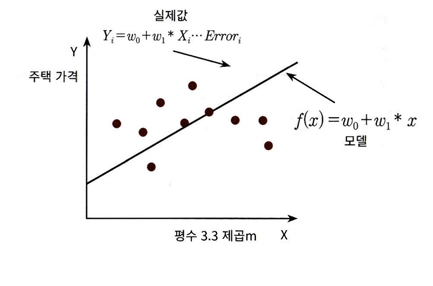

- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값
- 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만드는 것이 최적의 회귀임.

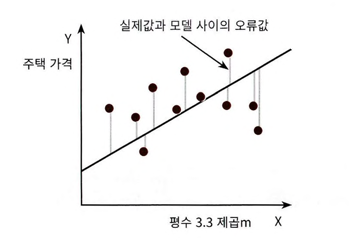

- RSS(Residual Sum of Square): 오류의 값의 제곱을 구해서 더하는 방식

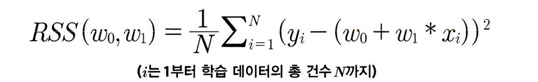

### **03 비용 최소화하기 - 경사 하강법(Gradient Descent)소개**

- 경사 하강법의 핵심은 " 어떻게 하면 오류가 작아지는 방향으로 값을 보정할 수 있을까?임."

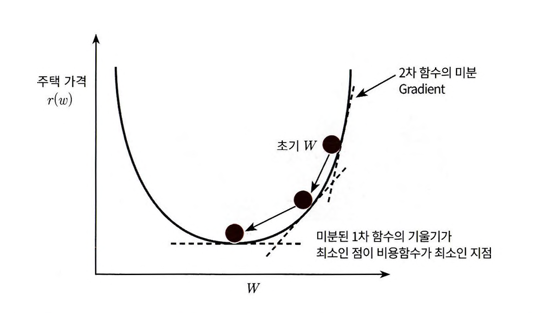

- 경사 하강법 프로세스

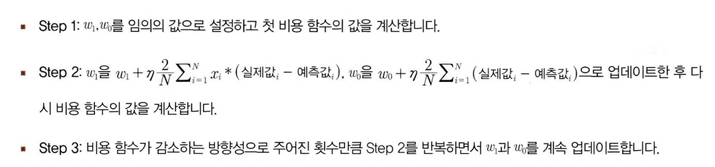

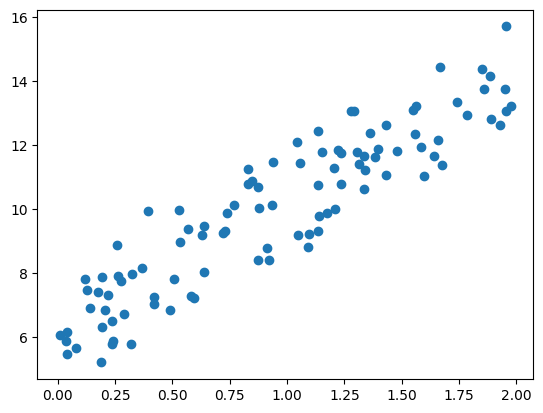

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1) # 균등 분포
y = 6 + 4*X + np.random.randn(100, 1) # 표준정규분포

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

In [ ]:
# w1와 w0을 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 게산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이터 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1: {0: .3f} w0: {1: .3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.022 w0:  6.162
Gradient Descent Total Cost: 0.9935


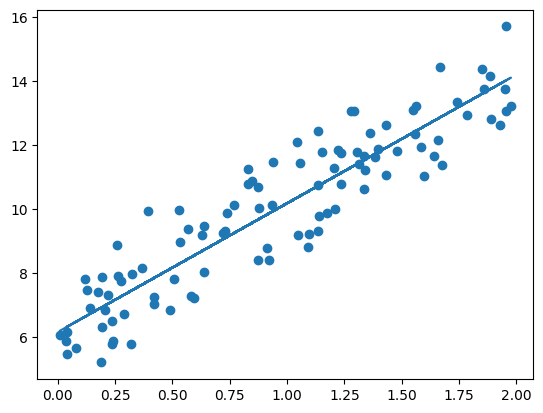

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저정
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


### **04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

- LInearRegression 클래스 - Ordinary Least Squares
  - LinearRegression 클래스는 에측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스임.
  - LInearRegression 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Coeffictionts)인 W를 coef_ 속성에 저장
  


In [ ]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

  1. 입력 파라미터
    - fit_intercept: 불린 값으로, 디폴트는 True임. intercept(절편) 값을 계산할 것인지 말지를 지정, 만일 False로 지정하면, intercept가 사용되지 않고 0으로 지정
    
    - normalize: 불린 값으로 디폴트는 False입니다. fit_intercept가 False인 경우에는 이 파라미터가 무시됨, 만일 True이면, 회귀를 수행하기 전에 입력 데이터 세트를 정규화함.

    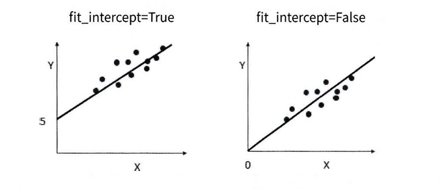




2. 속성:
    - coef_: fit() 메서드를 수행했을 떄 회귀 계수가 배열 형태로 저장하는 속성, Shape는 (Target 값 개수, 피처 개수)
    - intercept_: intercept 값


-  회귀 평가 지표

  1. MAE: Mean Absolute Error(MAE)이며 실제 값과 에측값의 차이를 절댓값으로 변환해 평균한 것임.
  2. MSE: Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것임.
  3. RMSE: MSE 같은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Roost Mean Squared Error)임.
  4. R^2: 분산 기반으로 예측 성능을 평가함. 실제 값이 분산 대비 예측 값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음.

  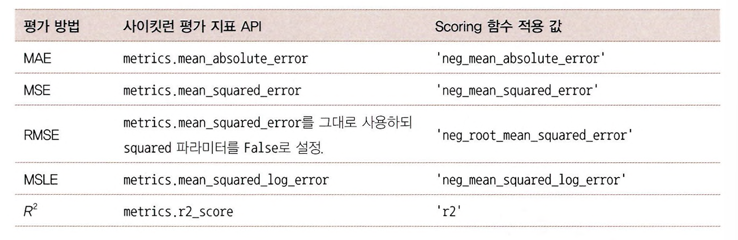

-  LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

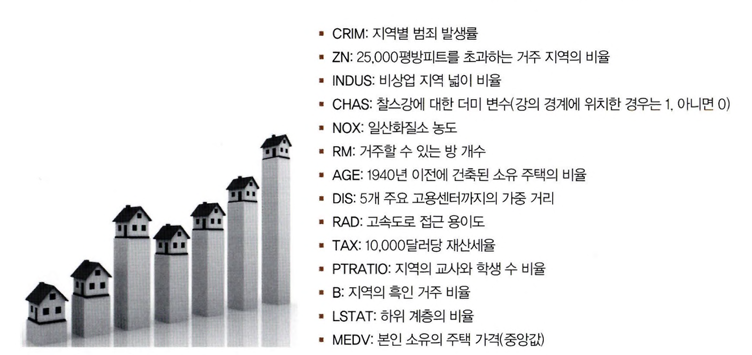

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 교재
# from sklearn.datasets import load_boston
# %matplotlib inline
# boston 데이터 세트 로드
# boston = load_boston()
# boston 데이터 세트 DataFrame 변환
# bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
# bostonDF['PRICE'] = boston.target
# print('Boston 데이터 세트 크기:', bostonDF.shape)
# bostonDF.head()

import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
bostonDF = pd.DataFrame(data, columns=feature_names)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


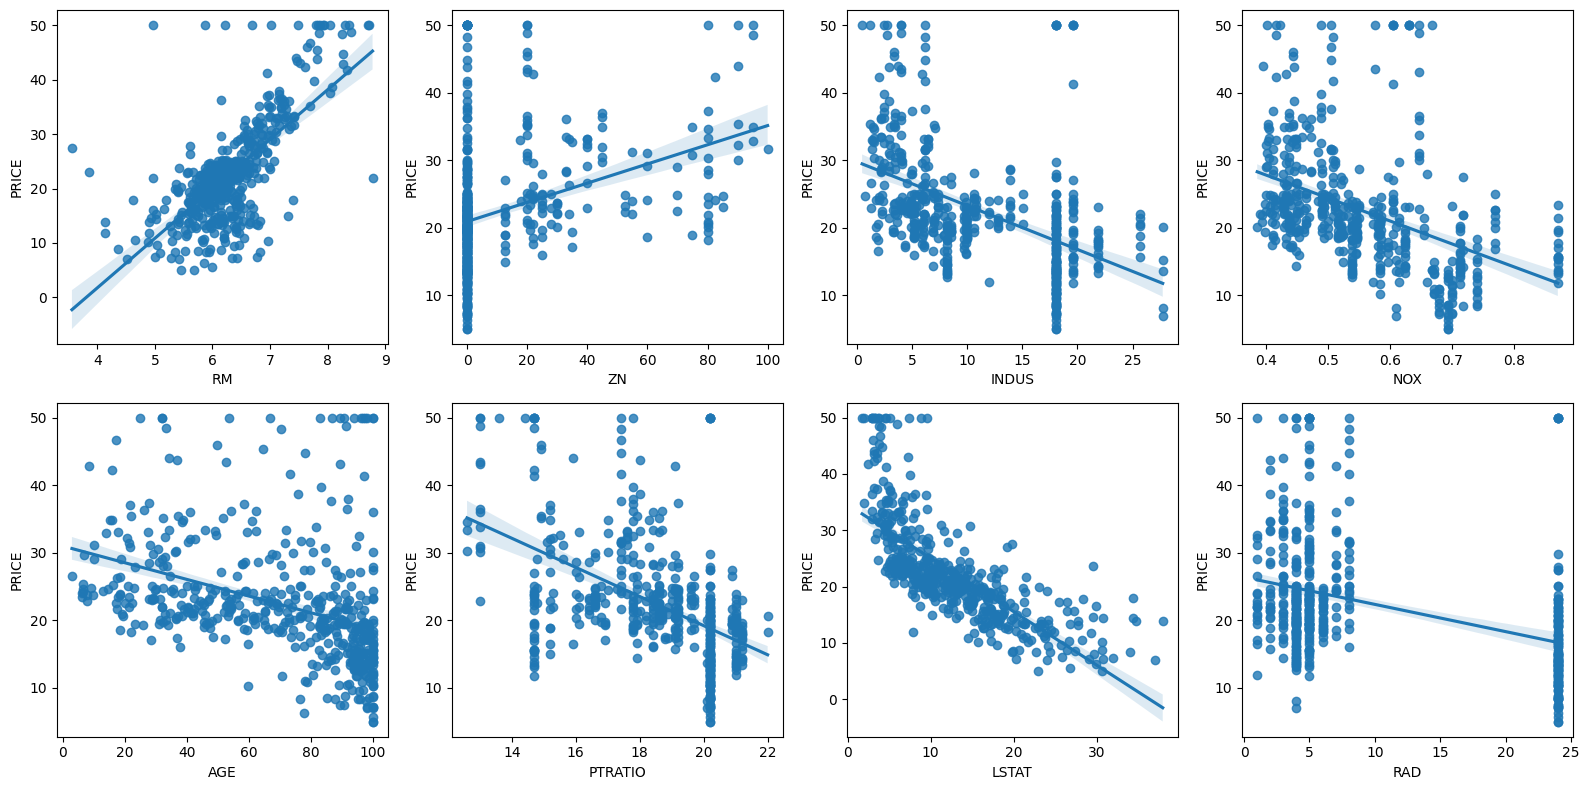

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
# 레이아웃 수정
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE ： {1:.3f}'.format(mse, rmse))
print('Variance score ： {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE ： 4.159
Variance score ： 0.757


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Seriers로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores：', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE :{0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores： [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE :5.829 


### **05 다항 회귀와 과(대)적합/과소적합 이해**

- 다항 회귀 이해
  - 다항 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
  - 다항회귀는 선형 회귀임.

  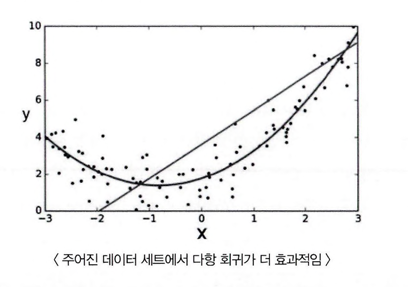

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1] [2,3]]의 2*2  행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature： \n' , X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature： 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
 # 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature： \n',poly_ftr)
 # Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np. round (model.coef_, 2))
print('Polynomial 회귀 Shape ：', model.coef_.shape)

3차 다항식 계수 feature： 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape ： (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y
 # Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print( 'Polynomial 회귀 계수\n', np. round (model. named_steps[ 'linear' ] .coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


-  다항 회귀를 이용한 과소적합 및 과적합 이해
  - 다항 회귀의 차수를 높일 수록 학습 데이터에만 너무 맞춘 학습이 이루어져서 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐
  - 차수가 높아질수록 과적합의 문제가 크게 발생
  

In [ ]:
import numpy as np
import matplotlib.pyplot as pit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
 # 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)
 # 수는 0부터 1 까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
# y 값은 코사인 기반의 tr나e_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다
Degree 1 MSE 는 0.4077289625098685 입니다


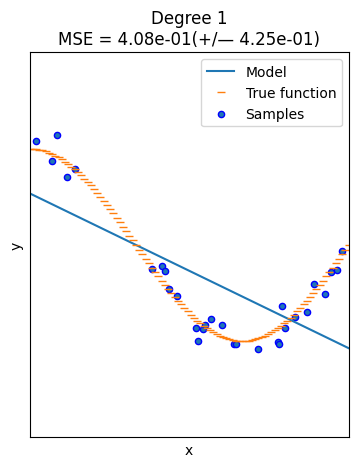


Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE 는 0.04320874987232064 입니다


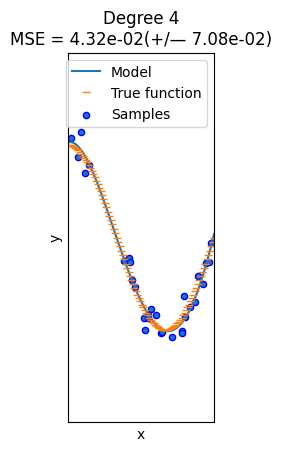


Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다
Degree 15 MSE 는 181238256.56423894 입니다


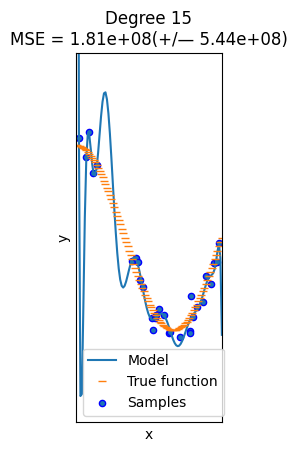

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())
 # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
  ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

# 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
# Pipeline을 구성하는 세부 객체를 접근하는 named_steps[’객체명,]을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print ('\nDegree {0} 회귀 계수는 {1} 입니다'.format (degrees [i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다'.format (degrees [i], -1 *np. mean (scores)))
 # 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
 # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
 # 예측값 곡선
  pit.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label = "Model")
 # 실제 값 곡선
  pit.plot(X_test, true_fun(X_test), "_", label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); pit.ylim((-2, 2)); pit.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/— {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
  plt.show()

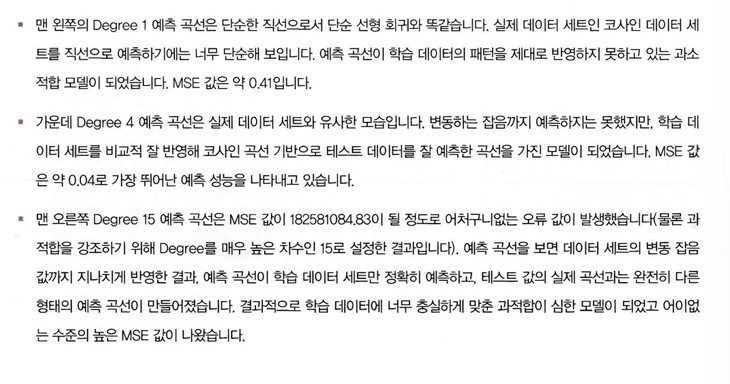

-  편향-분산 트레이드오프(Bias-Variance Trade off)
  - 고분산: 지나치게 높은 변동성
  - 고편향성: 한 방향성으로 치우친 경향

  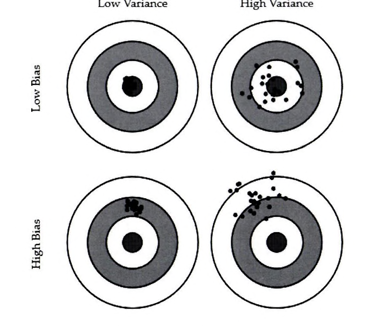

  1. 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아짐.

  2.  편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨.

  
-> 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법임.


## **06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**

- 규제 선형 모델의 개요